In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,accuracy_score


In [2]:
df=pd.read_csv("Churn_Modelling.csv")

In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
x=df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]

y=df[['Exited']]

In [7]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64
9996,516,35,10,57369.61,1,1,1,101699.77
9997,709,36,7,0.00,1,0,1,42085.58
9998,772,42,3,75075.31,2,1,0,92888.52


In [8]:
y.value_counts()

Exited
0         7963
1         2037
dtype: int64

In [9]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
print(x_scaled)

[[0.538      0.32432432 0.2        ... 1.         1.         0.50673489]
 [0.516      0.31081081 0.1        ... 0.         1.         0.56270874]
 [0.304      0.32432432 0.8        ... 1.         0.         0.56965435]
 ...
 [0.718      0.24324324 0.7        ... 0.         1.         0.21039009]
 [0.844      0.32432432 0.3        ... 1.         0.         0.46442905]
 [0.884      0.13513514 0.4        ... 1.         0.         0.19091423]]


In [10]:
x_train,x_test,y_train ,y_test=train_test_split(x_scaled,y,random_state=0,test_size=0.25)

In [11]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),
                  random_state=0,
                  max_iter=100)

In [12]:
ann.fit(x_train,y_train)

C:\Users\waghr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\waghr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [13]:
  y_pred=ann.predict(x_test)

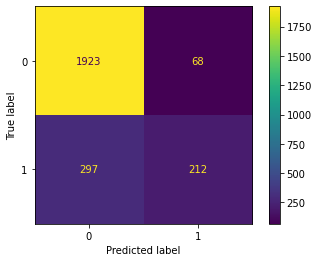

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1991
           1       0.76      0.42      0.54       509

    accuracy                           0.85      2500
   macro avg       0.81      0.69      0.73      2500
weighted avg       0.84      0.85      0.84      2500



In [16]:
accuracy_score(y_test,y_pred)*100

85.39999999999999

In [32]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
x_res,y_res=ros.fit_resample(x,y)


In [23]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x_res)
print(x_scaled)

[[0.538      0.32432432 0.2        ... 1.         1.         0.50673489]
 [0.516      0.31081081 0.1        ... 0.         1.         0.56270874]
 [0.304      0.32432432 0.8        ... 1.         0.         0.56965435]
 ...
 [0.43       0.45945946 0.5        ... 1.         0.         0.8753804 ]
 [0.406      0.40540541 0.3        ... 0.         1.         0.15361152]
 [0.284      0.41891892 0.8        ... 1.         1.         0.91435487]]


In [24]:
x_train,x_test,y_train ,y_test=train_test_split(x_scaled,y_res,random_state=0,test_size=0.25)

In [25]:
ann=MLPClassifier(hidden_layer_sizes=(100,100,100),
                  random_state=0,
                  max_iter=100)

In [26]:
ann.fit(x_train,y_train)

C:\Users\waghr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\waghr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100, random_state=0)

In [27]:
y_pred=ann.predict(x_test)

In [28]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      1981
           1       0.80      0.77      0.79      2001

    accuracy                           0.79      3982
   macro avg       0.79      0.79      0.79      3982
weighted avg       0.79      0.79      0.79      3982



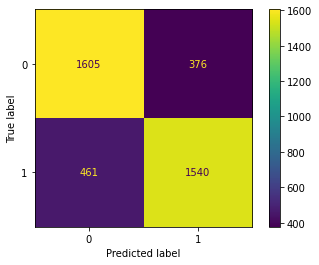

In [29]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [30]:
accuracy_score(y_test,y_pred)

0.7898041185334003